In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [2]:
mnistData = load_data()

11501568/11490434 [==============================] - 10s 1us/step


In [4]:
(x_train, y_train), (x_test, y_test) = mnistData #( (x_train, y_train), (x_test, y_test) )

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

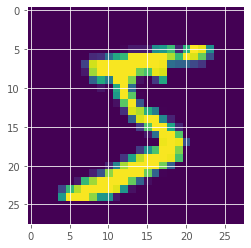

In [11]:
plt.imshow(x_train[0]) #면, 행, 열
plt.show()

In [12]:
y_train[0]

5

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
x_trainM = x_train.reshape(60000, 28*28)
# x_train.reshape(-1, 28*28)
x_trainM.shape

(60000, 784)

In [18]:
model = Sequential()
model.add( Dense( units=64, input_dim=784, activation='relu' ) ) #vanishing gradient 방지
model.add( Dense( units=32, input_dim=64, activation='relu' ) )
model.add( Dense( units=10, input_dim=32, activation='softmax' ) )
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
model.fit(x_trainM, y_trainOne, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 768us/step - loss: 1.7662 - acc: 0.7698
Epoch 2/10
1875/1875 [==============================] - 1s 746us/step - loss: 0.3670 - acc: 0.9040
Epoch 3/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.2449 - acc: 0.9327
Epoch 4/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.1905 - acc: 0.9455
Epoch 5/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.1540 - acc: 0.9570
Epoch 6/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.1374 - acc: 0.9608
Epoch 7/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.1234 - acc: 0.9654
Epoch 8/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.1081 - acc: 0.9693
Epoch 9/10
1875/1875 [==============================] - 1s 751us/step - loss: 0.1041 - acc: 0.9705
Epoch 10/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.0951 - acc: 0.9733


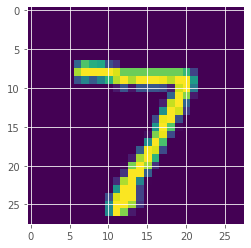

In [19]:
plt.imshow(x_test[0])
plt.show()

In [20]:
y_test[0]

7

In [23]:
model.predict(x_test[0].reshape(1, 28*28)).argmax( axis=1 )

array([7], dtype=int64)

In [28]:
model.predict(x_test.reshape(-1, 28*28)).argmax( axis=1 )

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
model.evaluate(x_test.reshape(-1, 28*28), to_categorical(y_test))

313/313 [==============================] - 0s 883us/step - loss: 0.1519 - acc: 0.9641


[0.1519058644771576, 0.9641000032424927]